## **DWT、SWT 應用 : DWT混疊證明**

Use a Multiple Resolution to Decompose Signal

**分析分解後的cA(低頻)、cD(高頻) 訊號**

In [107]:
from numpy.fft import fft
import pywt
import os
import configparser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **讀取訊號**
訊號包含　: 100Hz 、 200Hz 、 300Hz 、400Hz 的正弦波

In [108]:
# 定義訊號取樣頻率及時域座標
sample_rate = 1024 # 取樣頻率 [pts/sec] =fs (sampling frequency)
d = 1/sample_rate # 取樣間隔(週期) d = 1/fs [sec/pts]
t_domain = np.arange(0, 1.0, d)  # 畫出以取樣間隔 d，時間0~1秒的時域座標 : 共 1000個點
N = len(t_domain)
print(t_domain.shape)

# # 生成隨時間變化的正弦波形
# f1 = 100
# f2 = 200
# f3 = 300
# f4 = 400
# data = np.piecewise(t_domain, [t_domain < 1, t_domain < 0.8, t_domain < 0.5, t_domain < 0.3],
#                     [lambda t_domain : 100 * np.sin(2 * np.pi * f4 * t_domain),
#                      lambda t_domain : 100 * np.sin(2 * np.pi * f3 * t_domain),
#                      lambda t_domain : 100 * np.sin(2 * np.pi * f2 * t_domain),
#                      lambda t_domain : 100 * np.sin(2 * np.pi * f1 * t_domain)])

f4 = 400
data = np.piecewise(t_domain, [t_domain < 1],
                    [lambda t_domain : 100 * np.sin(2 * np.pi * f4 * t_domain),])


# 定義頻域座標
f_d = sample_rate / len(t_domain) # 頻域取樣間隔 = 1/Nd = fs(取樣頻率) / N (總點數)
f_domain = np.arange(0, sample_rate, f_d) # 畫出以取樣間隔為 f_d, 頻率0~fs (取樣頻率sample_rate) 的頻域座標

(1024,)


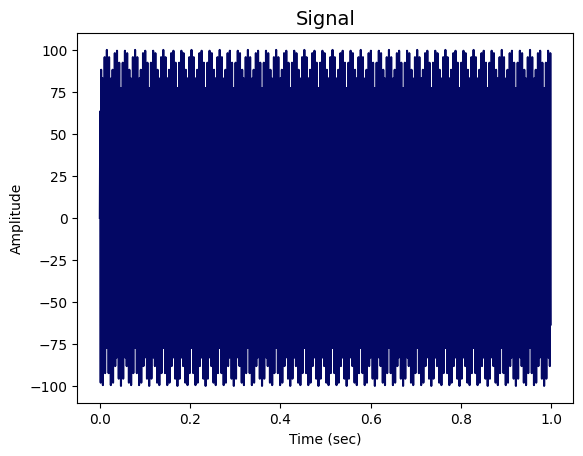

In [109]:
# 畫出時域訊號
plt.plot(t_domain, data, color = 'xkcd:darkblue')
plt.title('Signal', fontsize = 14)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

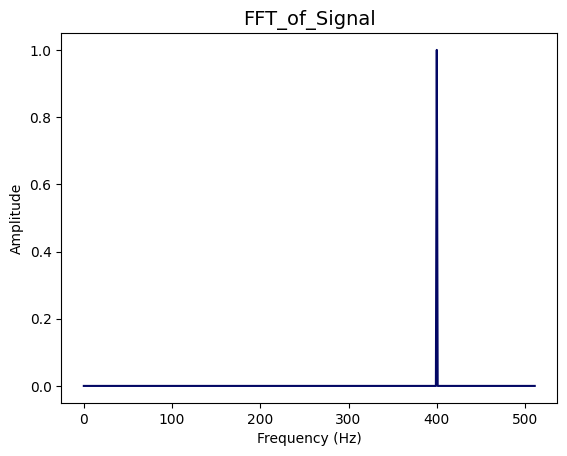

In [110]:
# FFT
data_FFT = fft(data)
data_FFT = abs(data_FFT[:int(len(data)/2)])

# 頻域單位向量化
data_FFT = data_FFT / np.sqrt(np.sum(data_FFT**2))


plt.plot(f_domain[:int(len(data)/2)], data_FFT , color = 'xkcd:darkblue')
plt.title('FFT_of_Signal', fontsize = 14)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

### **多層DWT小波轉換 (haar小波基)**

coeffs : cA_n, cD_n, cD_(n-1), ..., cD_1

3
cA2 (最低頻).shape = (256,)
cD2 (第二高頻).shape = (256,)
cD1 (最高頻).shape = (512,)


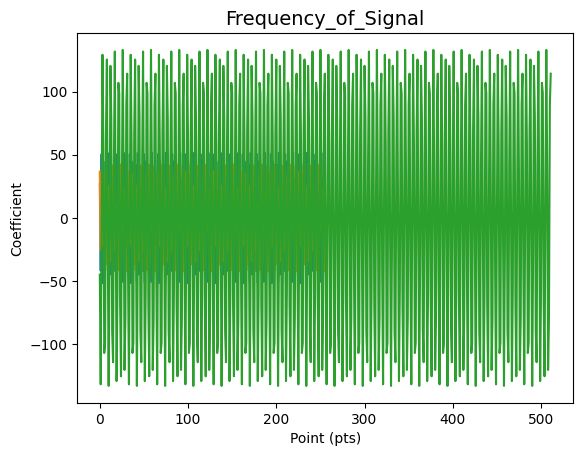

In [111]:
coeffs = pywt.wavedec(data, 'haar', level= 2) # DWT ， 二層分解， mode = periodic - 週期性的訊號 (∵訊號對稱)

print(len(coeffs))
cA2, cD2, cD1 = coeffs

print('cA2 (最低頻).shape =', cA2.shape)
print('cD2 (第二高頻).shape =', cD2.shape)
print('cD1 (最高頻).shape =', cD1.shape)

plt.title('Frequency_of_Signal', fontsize = 14)
plt.plot(cA2)
plt.plot(cD2)
plt.plot(cD1)
plt.xlabel('Point (pts)')
plt.ylabel('Coefficient')
plt.show()

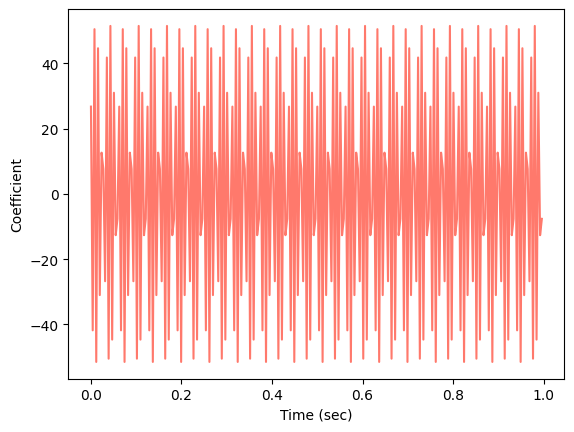

In [112]:
cA2_sample_rate = len(cA2) / 1 # 取樣頻率 = pts / sec  : 一秒有幾個點

t_domain_level2 = np.arange(len(cA2)) * (1 / cA2_sample_rate)
plt.plot(t_domain_level2, cA2 ,color = 'xkcd:salmon')
plt.xlabel('Time (sec)')
plt.ylabel('Coefficient')
plt.show()


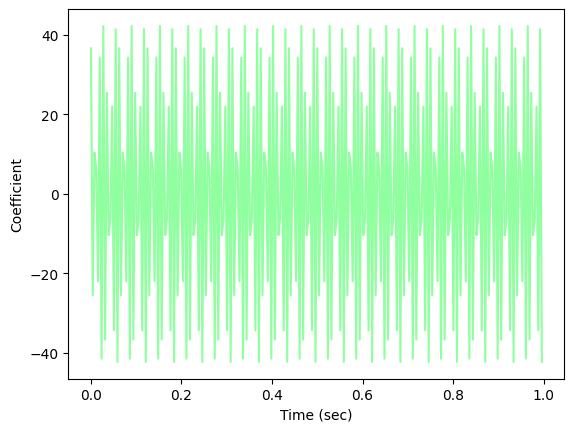

In [113]:
cD2_sample_rate = len(cD2) / 1 # 取樣頻率 = pts / sec  : 一秒有幾個點

t_domain_level2 = np.arange(len(cD2)) * (1 / cD2_sample_rate)
plt.plot(t_domain_level2, cD2 ,color = 'xkcd:mint green')
plt.xlabel('Time (sec)')
plt.ylabel('Coefficient')
plt.show()


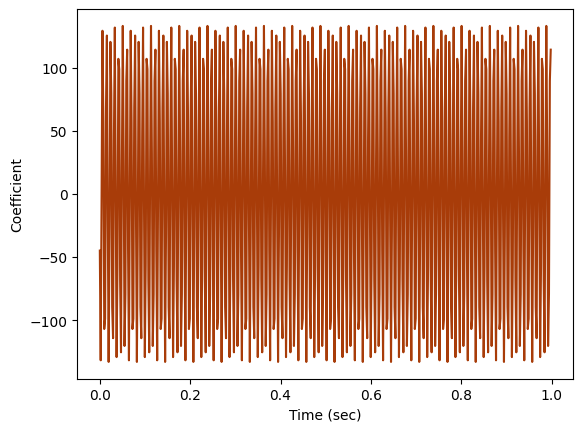

In [114]:
cD1_sample_rate = len(cD1) / 1 # 取樣頻率 = pts / sec  : 一秒有幾個點

t_domain_level1 = np.arange(len(cD1)) * (1 / cD1_sample_rate)
plt.plot(t_domain_level1, cD1 ,color = 'xkcd:rust')
plt.xlabel('Time (sec)')
plt.ylabel('Coefficient')
plt.show()

(256,)
(128,)
(128,)


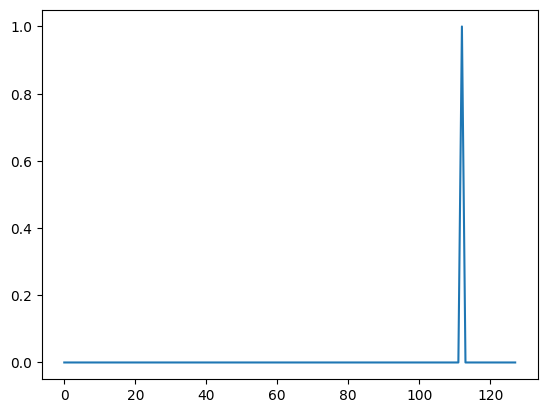

In [115]:
print(cA2.shape)
cA2_FFT = fft(cA2)
cA2_FFT = abs(cA2_FFT[:int(len(cA2)/2)]) # FFT 後取正頻率(一半)
cA2_FFT = cA2_FFT / np.sqrt(np.sum(cA2_FFT**2))
# 降取樣 -> fs 下降 -> 頻域範圍下降 -> 點數也下降 -> ∴ 降取樣過程 : 頻域取樣間隔 f_d = fs/2/N/2 = fs/N 不變
f_d_level2 = sample_rate  / (2 * 2 ) / (len(cA2)) # 降取樣後的取樣頻率 fs/(2*2) / 降取樣後點數 len(cA2)
f_domain_level2 = np.arange(int(len(cA2)/2)) * f_d_level2

print(cA2_FFT.shape)
print(f_domain_level2.shape)
plt.plot(f_domain_level2,cA2_FFT)

(256,)
(128,)


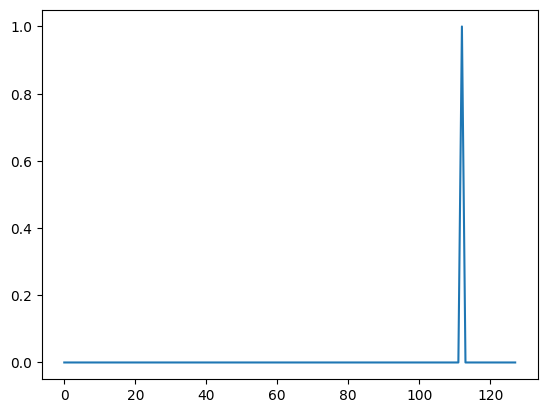

In [116]:
print(cD2.shape)
cD2_FFT = fft(cD2)
cD2_FFT = abs(cD2_FFT[:int(len(cD2_FFT)/2)])
cD2_FFT = cD2_FFT / np.sqrt(np.sum(cD2_FFT**2))
f_d_level2 = f_d
f_domain_level2 = np.arange(int(len(cD2)/2)) * f_d

print(cD2_FFT.shape)
plt.plot(f_domain_level2,cD2_FFT)

(512,)
(256,)


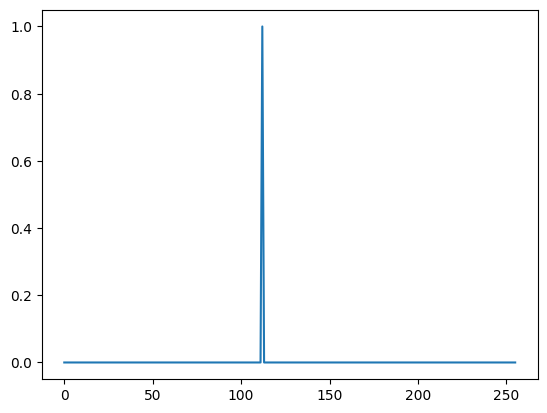

In [117]:
print(cD1.shape)
cD1_FFT = fft(cD1)
cD1_FFT = abs(cD1_FFT[:int(len(cD1)/2)]) # 取正頻率
cD1_FFT = cD1_FFT / np.sqrt(np.sum(cD1_FFT**2))

f_d_level1 = sample_rate  / (2 * 1 ) / (len(cD1)) # 降取樣後的取樣頻率 fs/(2*2) / 降取樣後點數 len(cA2)
f_domain_level1 = np.arange(int(len(cD1)/2)) * f_d_level1
print(cD1_FFT.shape)
plt.plot(f_domain_level1, cD1_FFT)

### **多層SWT轉換 - 沒有降取樣的DWT**

3
cA2.shape = (1024,)
cD2.shape = (1024,)
cD1.shape = (1024,)


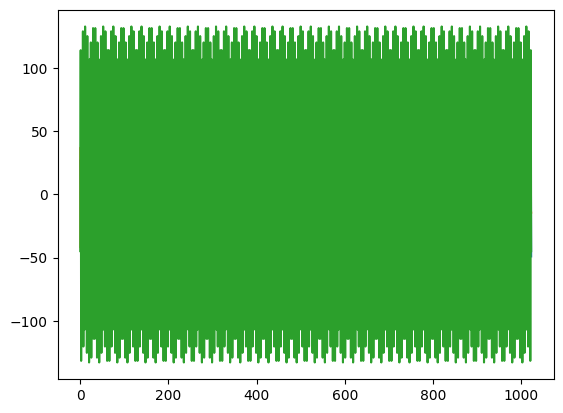

In [118]:
# SWT使用與DWT 相同規格的參數時，記得用 trim_approx = True
coeffs = pywt.swt(data, 'haar', level= 2, trim_approx = True) # DWT ， 二層分解， mode = periodic - 週期性的訊號 (∵訊號對稱)

print(len(coeffs))
cA2, cD2, cD1 = coeffs

print('cA2.shape =', cA2.shape)
print('cD2.shape =', cD2.shape)
print('cD1.shape =', cD1.shape)


plt.plot(cA2)
plt.plot(cD2)
plt.plot(cD1)

(1024,)
(512,)
(1024,)
(512,)
(1024,)
(512,)


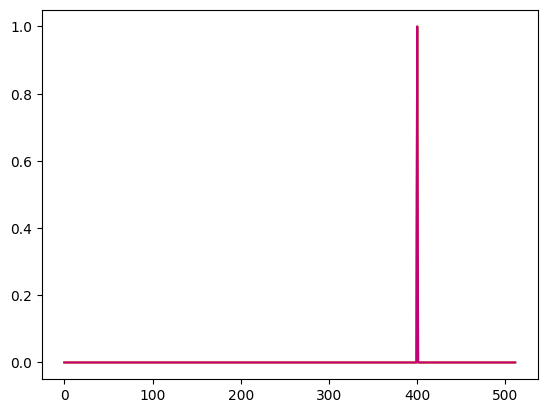

In [119]:
print(cA2.shape)
cA2_FFT = fft(cA2)
cA2_FFT = abs(cA2_FFT[:int(len(cA2_FFT)/2)])
cA2_FFT = cA2_FFT / np.sqrt(np.sum(cA2_FFT**2))

print(cA2_FFT.shape)
plt.plot(f_domain[:int(N/2)], cA2_FFT, color = 'xkcd:lightgreen')

print(cD2.shape)
cD2_FFT = fft(cD2)
cD2_FFT = abs(cD2_FFT[:int(len(cD2_FFT)/2)])
cD2_FFT = cD2_FFT / np.sqrt(np.sum(cD2_FFT**2))

print(cD2_FFT.shape)
plt.plot(f_domain[:int(N/2)], cD2_FFT, color = 'xkcd:orange')


print(cD1.shape)
cD1_FFT = fft(cD1)
cD1_FFT = abs(cD1_FFT[:int(len(cD1_FFT)/2)])
cD1_FFT = cD1_FFT / np.sqrt(np.sum(cD1_FFT**2))

print(cD1_FFT.shape)
plt.plot(f_domain[:int(N/2)], cD1_FFT, color = 'xkcd:magenta')



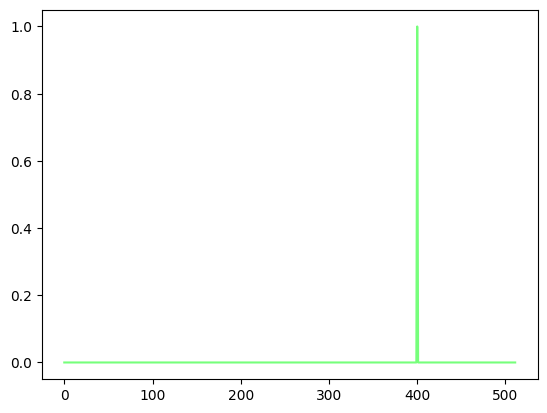

In [120]:
plt.plot(f_domain[:int(N/2)], cA2_FFT, color = 'xkcd:lightgreen')

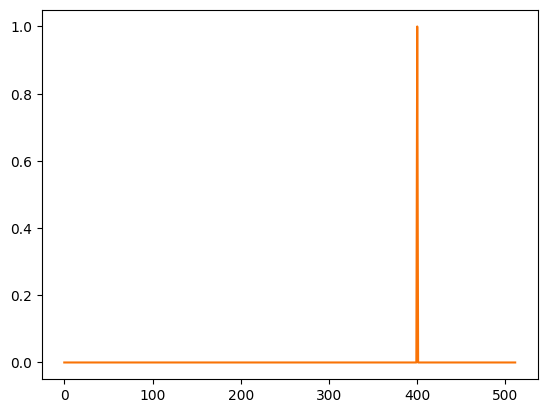

In [121]:
plt.plot(f_domain[:int(N/2)], cD2_FFT, color = 'xkcd:orange')

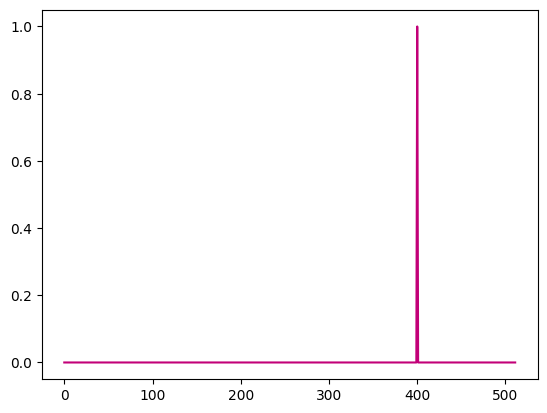

In [122]:
plt.plot(f_domain[:int(N/2)], cD1_FFT, color = 'xkcd:magenta')

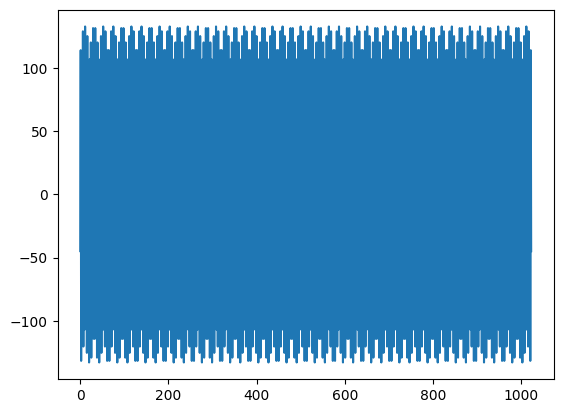

In [123]:
plt.plot(cD1)

### **驗證混疊效應**

將DWT、SWT分別得出的cD1後FFT

(512,)
(257,)


Text(0.5, 1.0, "FFT of DWT's cD1")

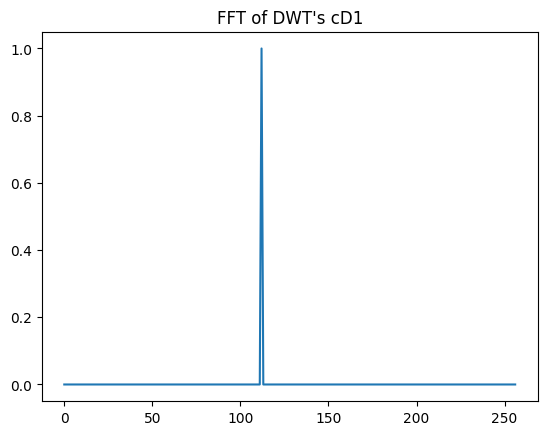

In [124]:
coeffs = pywt.wavedec(data, 'haar', level= 2) # DWT ， 二層分解， mode = periodic - 週期性的訊號 (∵訊號對稱)
cA2, cD2, cD1 = coeffs
print(cD1.shape)
DWT_cD1_FFT = fft(cD1)
DWT_cD1_FFT = abs(DWT_cD1_FFT[:(int(len(cD1)/2))+1]) # 取正頻率 (包含Nyquist Frequency)
# 頻域單位向量化
DWT_cD1_FFT = DWT_cD1_FFT / np.sqrt(np.sum(DWT_cD1_FFT**2))

f_d_level1 = f_d # 頻域取樣間隔 : 降取樣後的取樣頻率 fs/(2*2) / 降取樣後點數 len(cA2)
f_domain_level1 = np.arange(int(len(cD1)/2)+1) * f_d_level1
print(DWT_cD1_FFT.shape)
plt.plot(f_domain_level1, DWT_cD1_FFT)
plt.title('FFT of DWT\'s cD1')

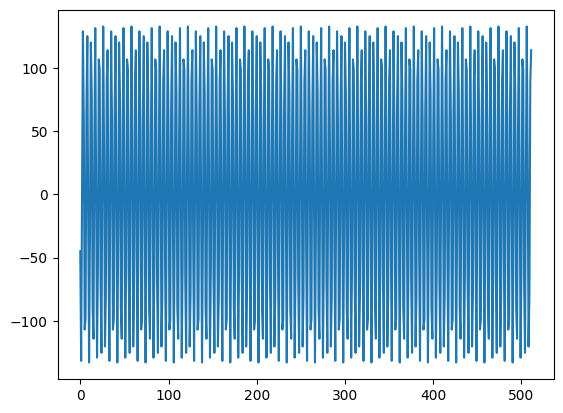

In [125]:
plt.plot(cD1)

In [126]:
np.argmax(DWT_cD1_FFT)

112

(1024,)
(513,)


Text(0.5, 1.0, "FFT of SWT's cD1")

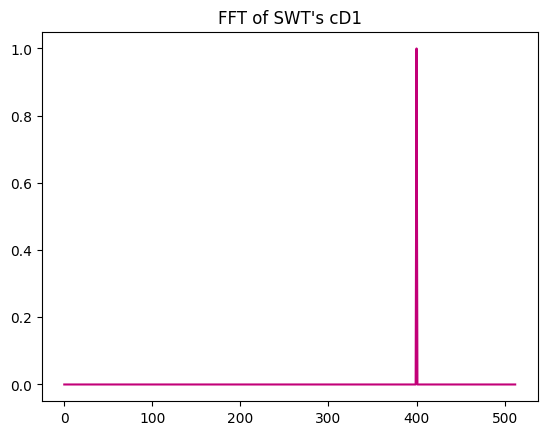

In [127]:
# SWT使用與DWT 相同規格的參數時，記得用 trim_approx = True
coeffs = pywt.swt(data, 'haar', level= 2, trim_approx = True) # DWT ， 二層分解， mode = periodic - 週期性的訊號 (∵訊號對稱)

cA2, cD2, cD1 = coeffs
print(cD1.shape)
SWT_cD1_FFT = fft(cD1) 
SWT_cD1_FFT = abs(SWT_cD1_FFT[:(int(len(cD1)/2))+1]) # 取正頻率 (包含Nyquist Frequency)
SWT_cD1_FFT = SWT_cD1_FFT / np.sqrt(np.sum(SWT_cD1_FFT**2)) # 單位向量化

f_d_level1 = f_d # 頻域取樣間隔 : 降取樣後的取樣頻率 fs/(2*2) / 降取樣後點數 len(cA2)
f_domain_level1 = np.arange(int(len(cD1)/2)+1) * f_d_level1
print(SWT_cD1_FFT.shape)
plt.plot(f_domain_level1, SWT_cD1_FFT, color = 'xkcd:magenta')
plt.title('FFT of SWT\'s cD1')

In [128]:
print(f_domain_level1[-1])

512.0


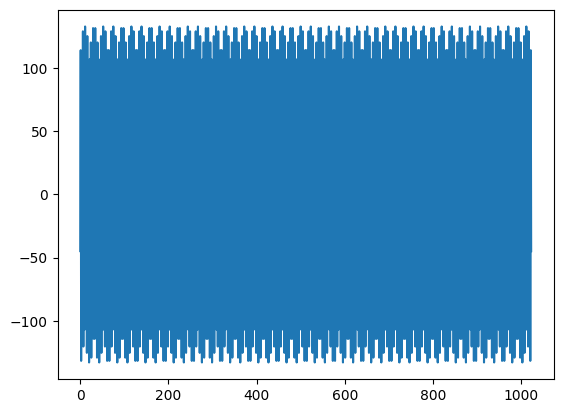

In [129]:
plt.plot(cD1)

In [130]:
np.argmax(SWT_cD1_FFT)

400

#### **開始驗證**

**因為DWT降採樣兩倍，SWT沒有降採樣，代表Nyquist Frequency(fs)沒變**

**將SWT FFT後的頻譜 一半高頻部分(> fs/2 = SWT_cD1_FFT list 的後半段)取出並做水平翻轉**

**並與一半低頻部分(<fs/2, SWT_cD1_FFT list的前半段) 相加，並與DWT FFT做比較**

In [131]:

SWT_cD1_FFT_low_band = SWT_cD1_FFT[:int(len(SWT_cD1_FFT)/2)+1] # 0~Nyquist_Frquency
SWT_cD1_FFT_high_band = SWT_cD1_FFT[int(len(SWT_cD1_FFT)/2)+1:]

print(SWT_cD1_FFT_low_band.shape)
print(SWT_cD1_FFT_high_band.shape)


(257,)
(256,)


In [132]:
# 翻轉高頻訊號並相加
SWT_cD1_FFT_processed = SWT_cD1_FFT_low_band[:-1] + SWT_cD1_FFT_high_band[::-1] # 低頻不包含Nyquist Frequency的部分 + 高頻翻轉的部分
SWT_cD1_FFT_processed = np.append(SWT_cD1_FFT_processed, SWT_cD1_FFT_low_band[-1]) # 最後加上Nyquist Frequency的部分

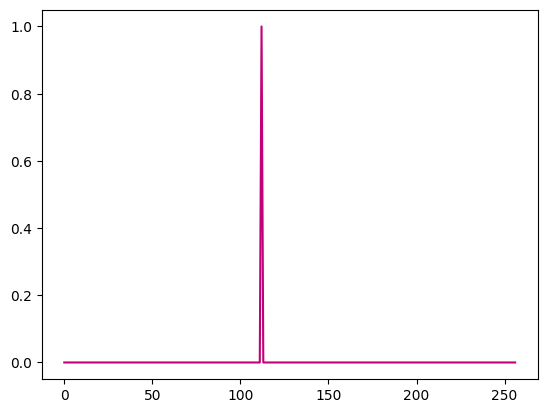

In [133]:
f_domain_level1 = np.arange(int(len(SWT_cD1_FFT_processed))) * f_d
plt.plot(f_domain_level1, SWT_cD1_FFT_processed, color = 'xkcd:magenta')

In [134]:
np.argmax(SWT_cD1_FFT_processed)

112

#### **DWT & 處理過後的SWT 頻域分布畫在一起做比較**

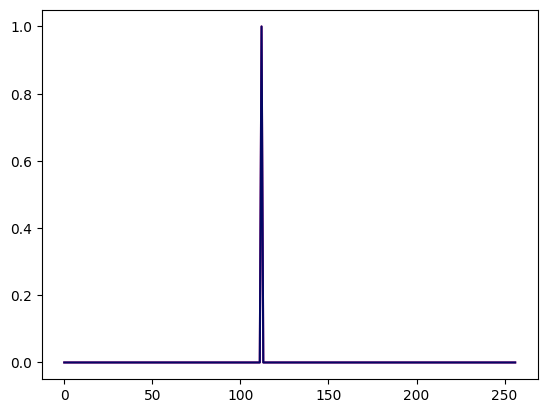

In [135]:
plt.plot(f_domain_level1, SWT_cD1_FFT_processed, color = 'xkcd:magenta')
plt.plot(f_domain_level1, DWT_cD1_FFT, color = 'xkcd:darkblue')
plt.show()

In [136]:
np.argmax(SWT_cD1_FFT_low_band)

229

In [137]:
np.argmax(DWT_cD1_FFT)

112

In [138]:
DWT_cD1_FFT[111]

2.1070655348941465e-15

In [139]:
DWT_example = np.array([0,0,3,0]) 

In [140]:
SWT_example = np.array([0,0,0,0,0,3,0,0]) 

print(len(SWT_example))

SWT_example_low_band = SWT_example[:int(len(SWT_example)/2)]
SWT_example_high_band = SWT_example[int(len(SWT_example)/2):]

SWT_example_low_band += SWT_example_high_band[::-1]


print(DWT_example)
print(SWT_example_low_band)


8
[0 0 3 0]
[0 0 3 0]
